In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt

#raw data
df=pd.read_csv(r'data/CSPDS.csv')

#df['County'] = df['Region Name'].str.split(' ')[0]

#code for calculating chloropleth
zip = geopandas.read_file('shapefiles/cb_2018_us_zcta510_500k.shp')
counties =geopandas.read_file('shapefiles/cb_2018_us_county_20m.shp')
#csa = geopandas.read_file('shapefiles/cb_2018_us_csa_20m.shp')
states = geopandas.read_file('shapefiles/cb_2018_us_state_20m.shp')
#print(csa.head())

zip = zip.to_crs("EPSG:3395")
counties=counties.to_crs("EPSG:3395")
#csa = csa.to_crs("EPSG:3395")
states = states.to_crs("EPSG:3395")
        

#Alaska and Hawaii excluded due to lack of CSA
states=states[states['NAME'] != 'Alaska']
states=states[states['NAME'] != 'Hawaii']
states=states[states['NAME'] != 'Puerto Rico']

counties=counties[counties['STATEFP'] != '02']
counties=counties[counties['STATEFP'] != '15']
counties=counties[counties['STATEFP'] != '72']

us_boundary_map = states.boundary.plot(figsize=(18, 12),color="Black", linewidth=.1)
#.plot(figsize=(18, 12),color="Black", linewidth=.1)
counties.plot(ax=us_boundary_map, cmap='magma')
counties
#zip

In [ ]:
import folium





In [ ]:




from fredapi import Fred
fred = Fred(api_key='d7f545fe7858da4279909dd26a7b28cc')
data = fred.get_series('DAAA')
data.plot()
data
print

In [ ]:


print(type(data))
data


In [ ]:

from datetime import datetime

#convert time

year= '2020'

year_dt = datetime.strptime(year, '%Y')

print(str(year_dt.date()))


In [ ]:
import folium
import io
import pandas as pd

import os
cwd = os.getcwd()
os.chdir(cwd)


county_map=r'shapefiles/cb_2018_us_county_20m.geojson'

        

#coordinate = (37.8199286, -122.4782551)
m = folium.Map(
    tiles='CartoDB positron',
    location=[48, -102],
    zoom_start=3,            
)

folium.GeoJson(county_map, name="geojson").add_to(m)

#folium.GeoJson(open(county_map).read()).add_to(m)

# folium.TopoJson(
#    open(county_map)).add_to(m)

#folium.Choropleth(open(county_map)).add_to(m)

#folium.Choropleth(geo_data=county_map).add_to(m)

#  folium.Choropleth(
    #  geo_data=county_map,
    # name="choropleth",
    # data=state_data,
    # columns=["State", "Unemployment"],
    # key_on="feature.id",
    #fill_color="YlGn",
    #fill_opacity=0.7,
    # line_opacity=0.2,
    #legend_name="Median Housing Price Correlations",
# ).add_to(m)



folium.LayerControl().add_to(m)



m

In [ ]:
import branca
import json
import requests

county_data = r'shapefiles/us_county_data.csv'
county_geo = r'shapefiles/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[" "])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index("FIPS_Code")["Employed_2011"]


def style_function(feature):
    employed = employed_series.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed),
    }


m = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

folium.TopoJson(
    open(county_geo),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m)


m




In [ ]:
import folium
import io
import pandas as pd
import json
import requests
import os

county_data = r'shapefiles/us_county_data.csv'
#county_geo = r'shapefiles/gz_2010_us_050_00_20m.json'
county_geo = r'shapefiles/cb_2018_us_county_20m.geojson'


df = pd.read_csv(county_data, na_values=[" "])
print(df.dtypes)
df["FIPS_Code"] = df["FIPS_Code"].astype(str)
print(df.dtypes)

m = folium.Map(location=[48, -102], tiles="cartodbpositron", zoom_start=3)

#folium.GeoJson(county_geo, name="geojson").add_to(m)

bins = list(df["Unemployment_rate_2011"].quantile([0, 0.25, 0.5, 0.75, 1]))


folium.Choropleth(
    geo_data= county_geo,
    name="choropleth",
    data=df,
    columns=["FIPS_Code","Unemployment_rate_2011"],
    key_on="properties.GEOID",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Unemployment Rate (%)",
    bins=bins,
    reset=True,
).add_to(m)

folium.LayerControl().add_to(m)

m





In [ ]:



import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m



## Import FRED data

In [1]:
import pandas as pd
from fredapi import Fred
from pandas_datareader import data

fred = Fred(api_key='d7f545fe7858da4279909dd26a7b28cc')

df = {}

df['CASE-SHILLER'] = fred.get_series('CSUSHPISA', observation_start='1/31/1996') #S&P/Case-Shiller U.S. National Home Price Index
df['CPI'] = fred.get_series('CPIAUCSL', observation_start='1/31/1996') #Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
df['M2'] = fred.get_series('WM2NS', observation_start='1/31/1996')#M2 Money Stock
df['UNRATE'] = fred.get_series('UNRATE', observation_start='1/31/1996')#M2 Money Stock
df['EFFR'] = fred.get_series('EFFR', observation_start='1/31/1996')#Effective Federal Funds Rate
df['10YR'] = fred.get_series('DGS10', observation_start='1/31/1996') #10-Year Treasury Constant Maturity Rate
df['30YR_MORT'] = fred.get_series('MORTGAGE30US', observation_start='1/31/1996') #30-Year Fixed Rate Mortgage Average in the United States
df['PERS_SAV'] = fred.get_series('PSAVERT', observation_start='1/31/1996') #Personal Saving Rate
df['WTI_OIL'] = fred.get_series('DCOILWTICO', observation_start='1/31/1996') #Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
df['BUSLOANS'] = fred.get_series('BUSLOANS', observation_start='1/31/1996')#Commercial and Industrial Loans, All Commercial Banks
df['CORP_BOND'] = fred.get_series('DAAA', observation_start='1/31/1996')#Moody's Seasoned Aaa Corporate Bond Yield
df = pd.DataFrame(df).resample('M').mean()
#df=df.dropna()

#import SPY data 
start_date = pd.to_datetime('2012-01-31')
end_date = pd.to_datetime('2021-04-30')

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('SPX','yahoo', start_date, end_date)
spy=panel_data['Adj Close'].to_frame().resample('M').mean()

#add_df = pd.concat([df, spy])
fred_df = df.merge(spy, left_index=True, right_index=True)

del df, panel_data, spy

fred_df

#df_slice=add_df['2018-01-04':]['Adj Close']
#df_slice


,CASE-SHILLER,CPI,M2,UNRATE,EFFR,10YR,30YR_MORT,PERS_SAV,WTI_OIL,BUSLOANS,CORP_BOND,Adj Close
2012-01-31,136.602,227.842,9770.560,8.3,0.084500,1.966500,3.9150,8.0,100.273500,1321.3113,3.850000,0.072220
2012-02-29,136.526,228.329,9782.900,8.3,0.105000,1.967500,3.8900,8.0,102.204000,1344.4480,3.846500,0.096855
2012-03-31,137.902,228.807,9893.650,8.2,0.127273,2.172727,3.9540,8.5,106.157727,1351.1006,3.987273,0.105987
2012-04-30,139.156,229.187,9949.200,8.2,0.145238,2.052857,3.9100,8.7,103.321000,1368.4854,3.961429,0.096986
2012-05-31,140.158,228.713,9884.900,8.2,0.156364,1.803182,3.7980,8.8,94.654545,1378.9337,3.801364,0.084533
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-30,193.806,246.551,13704.075,4.2,1.155000,2.202000,3.8050,7.3,49.822000,2101.3416,3.629500,0.022200
2017-10-31,194.772,246.657,13749.120,4.1,1.155714,2.360000,3.8950,7.4,51.577727,2109.9100,3.597727,0.035182
2017-11-30,195.856,247.378,13822.975,4.2,1.155714,2.353333,3.9220,7.0,56.638571,2105.4603,3.574000,0.036429
2017-12-31,197.035,247.736,13933.500,4.1,1.298500,2.402500,3.9500,6.6,57.881500,2105.8431,3.507500,0.039250


## Data Test

In [ ]:
import pandas as pd
from datetime import datetime

zip_df=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\ZIP-COUNTY-FIPS_2017-06.csv')
cspds_df=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\CSPDSv1.csv')
zip_df.rename({'STCOUNTYFP': 'GEO_ID'}, axis=1, inplace=True)
zip_df["GEO_ID"] = zip_df["GEO_ID"].astype(str)
#print(zip_df.head())


df1=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df1['Bedrooms'] = '1'
df1_melt = pd.melt(df1, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')

df2=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df2['Bedrooms'] = '2'
df2_melt = pd.melt(df2, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')

df3=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df3['Bedrooms'] = '3'
df3_melt = pd.melt(df3, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')

df4=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df4['Bedrooms'] = '4'
df4_melt = pd.melt(df4, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')

df5=pd.read_csv(r'C:\Users\mattl\Documents\UVa - Data Science Masters\CS 5010\CS-5010-semester-project\data\Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df5['Bedrooms'] = '5'
df5_melt = pd.melt(df5, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')


df = pd.concat([df1_melt, df2_melt, df3_melt, df4_melt, df5_melt], axis=0)
df.rename({'RegionName': 'ZIP'}, axis=1, inplace=True)
del df1,df2,df3,df4,df5,df1_melt,df2_melt,df3_melt,df4_melt,df5_melt

df_merge=df.merge(zip_df, how='left')
df_merge['Date']=pd.to_datetime(df_merge['Date'])
df_merge=df_merge.set_index('Date').resample('M').mean() #foundational to time series
del df

final_df = df_merge.merge(add_df, left_index=True, right_index=True)
final_df

#2010 subset
df_2012=final_df[datetime(2012, 1, 1):]
del final_df

df_sub=df_2012[(df_2012['CountyName']=='New York County')]
del df_2012

#df_sub=df_sub.index.groupby(df_2010['price_index']).mean()

df_pp=df_sub[['price_index','CPI','M2','EFFR','10YR','Adj Close','Bedrooms']]
del df_sub

df_pp


In [ ]:
import seaborn as sns

sns.pairplot(df_pp, hue="Bedrooms")

In [ ]:

df_sub=df_2015[(df_2015['Metro']=='New York-Newark-Jersey City')]

df_pp=df_sub[['price_index','CPI','M2','EFFR','10YR','Adj Close','Bedrooms']]
df_pp



## Subset data and create pairplot

In [ ]:

import seaborn as sns

#df_sub=df_2015[(df_2015['Metro']=='New York-Newark-Jersey City')]


#df_pp=df_sub[['price_index','CPI','M2','EFFR','10YR','Adj Close','Bedrooms']]


sns.pairplot(df_pp, hue="Bedrooms")








## Single merge

In [56]:
import pandas as pd

############INITIALIZE DF
#read zip data
zip_df=pd.read_csv(r'data\ZIP-COUNTY-FIPS_2017-06.csv')
zip_df.rename({'STCOUNTYFP': 'GEO_ID'}, axis=1, inplace=True)
zip_df["GEO_ID"] = zip_df["GEO_ID"].astype(str)

#read bedroom data and melt
df1=pd.read_csv(r'data\Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df1['Bedrooms'] = '1'
df1 = pd.melt(df1, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'City', 'Metro', 'CountyName', 'Bedrooms'], var_name='Date', value_name='price_index')#.set_index('Date')
df1.rename({'RegionName': 'ZIP'}, axis=1, inplace=True)
df1['Date']=pd.to_datetime(df1['Date'])

#merge zip data
df1=df1.merge(zip_df, how='left')
df1=df1.set_index('Date')

#merge FRED dataset
df1 = df1.merge(fred_df, left_index=True, right_index=True)

#unique names for list
county_list=df1['CountyName'].unique()
state_list=df1['State'].unique()


############PAIRPLOT FUNCTION
#time slice
start_date = pd.to_datetime('1/1/2016')
end_date = pd.to_datetime('1/1/2020')
df1=df1[start_date:end_date]
#filter down to Bedroom##############
df1=df1[(df1['CountyName']=="Cook County") & (df1['State']=="IL")].groupby(['CountyName','State','Bedrooms'])['price_index','CASE-SHILLER','CPI','M2','EFFR','30YR_MORT','PERS_SAV','10YR','Adj Close','WTI_OIL','BUSLOANS','CORP_BOND'].resample('M').mean().dropna()


#df1.to_csv('df1.csv')
df1
df1=df1.reset_index(level=2, drop=True)
df1=df1.reset_index(level=1, drop=True)
df1=df1.reset_index(level=0, drop=True)
#df1.columns = df1.columns.map(''.join)
#df1.columns = df1.columns.droplevel(1)
#x_time=df1.xs('price_index', axis=1, level=0).to_list()


#pd.to_datetime(df['EventTime']).dt.date.unique().tolist()
df1['price_index']


<ipython-input-56-40c0d74ddb33>:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df1[(df1['CountyName']=="Cook County") & (df1['State']=="IL")].groupby(['CountyName','State','Bedrooms'])['price_index','CASE-SHILLER','CPI','M2','EFFR','30YR_MORT','PERS_SAV','10YR','Adj Close','WTI_OIL','BUSLOANS','CORP_BOND'].resample('M').mean().dropna()


2016-01-31    129429.067568
2016-02-29    129121.556291
2016-03-31    129972.960265
2016-04-30    130504.311258
2016-05-31    130768.304636
2016-06-30    130983.940789
2016-07-31    130785.980519
2016-08-31    130910.161290
2016-09-30    131348.535484
2016-10-31    131862.858065
2016-11-30    132748.748387
2016-12-31    133365.438710
2017-01-31    133942.419355
2017-02-28    134200.664516
2017-03-31    135038.174194
2017-04-30    135838.258065
2017-05-31    136562.954839
2017-06-30    137058.974194
2017-07-31    137320.625806
2017-08-31    137921.896774
2017-09-30    138218.942308
2017-10-31    138705.006410
2017-11-30    138948.839744
2017-12-31    139457.987179
2018-01-31    140475.069620
2018-02-28    141387.000000
2018-03-31    141689.465409
2018-04-30    141163.031250
2018-05-31    141390.362500
2018-06-30    141815.900000
2018-07-31    142126.156250
2018-08-31    142063.062112
2018-09-30    142321.850932
2018-10-31    142558.813665
2018-11-30    142428.481481
2018-12-31    142614

In [48]:
from datetime import datetime

#print(df1)
df1=df1.reset_index(level=0, drop=True)
#df1.columns = df1.columns.map(''.join)
#df1.columns = df1.columns.droplevel(1)
#x_time=df1.xs('price_index', axis=1, level=0).to_list()


#pd.to_datetime(df['EventTime']).dt.date.unique().tolist()
df1['price_index']



IndexError: Too many levels: Index has only 1 level, not 2

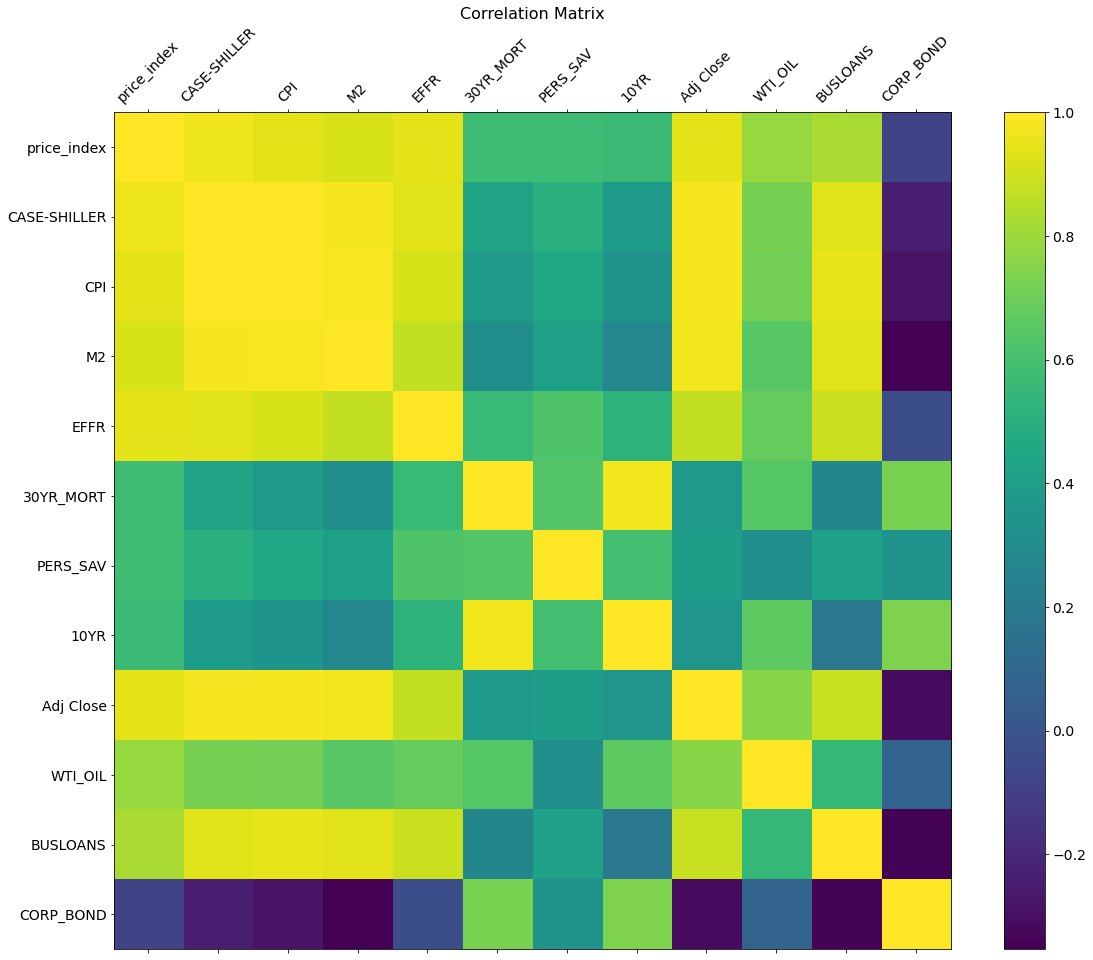

In [64]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);







In [ ]:
#convert dataframe to list
county=df1_melt['CountyName'].unique().to_list()
print(county)

#unique names for list
#county=df1['CountyName'].unique()

#2010 subset
#df_2015=final_df[datetime(2010, 1, 1):]